In [ ]:
import numpy as np
import pandas as pd
import re # Regular Expression - To search words in text or paragraph
import nltk.corpus
from nltk.corpus import stopwords # natural language took-kit (stop words are common words that are useless basically they dont provide anything useful in the textual data)
from nltk.stem.porter import PorterStemmer # gives us the root word of a particular word
from sklearn.feature_extraction.text import TfidfVectorizer # To convert text data into numerical values or feature vectors
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as mt
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('english')) # These words will be removed from the textual dataset

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
news_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebook/train.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
news_dataset.shape

(20800, 5)

In [ ]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
news_dataset.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [ ]:
# Reaplcing null values with empty strings
news_dataset = news_dataset.fillna('')

In [ ]:
news_dataset.isnull().sum()

,0
id,0
title,0
author,0
text,0
label,0


In [ ]:
news_dataset['label'].value_counts()

,count
label,
1,10413
0,10387


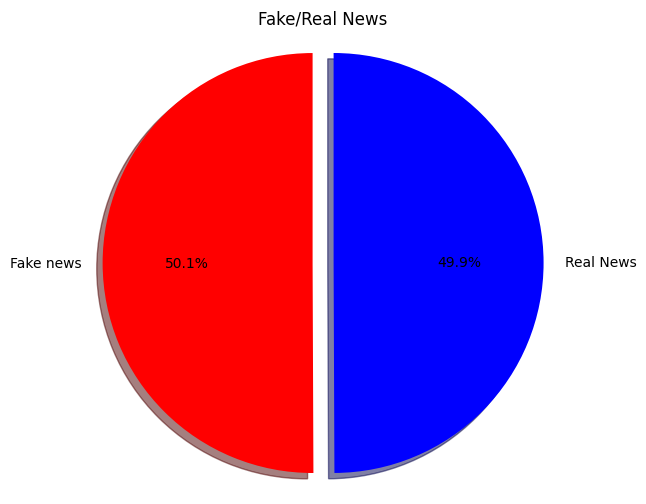

In [ ]:
# 1 --> Fake News
# 0 --> Real News

fake_news_distribution = news_dataset['label'].value_counts()

# Create a pie chart
labels = ['Fake news', 'Real News']
sizes = fake_news_distribution .values  # Corresponding counts
colors = ['red', 'blue']  # Custom colors
explode = (0.1, 0)  # Explode the first slice (if Male is first)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow = True,startangle=90)

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')
plt.title('Fake/Real News')
plt.show()

In [ ]:
# we are not going to include text as it is large data and will take a lot of time to process

# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']

In [ ]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [ ]:
# Stemming Procedure - Process of reducing a word to its Root Word (removing suffix)
# eg --> running -- (run) jumps -- (jump) etc

port_stem = PorterStemmer()

In [ ]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content) # only including letters (alphabets) and excluding everything else (numbers,special characters) by replacing them with space '  '
  stemmed_content = stemmed_content.lower() # converting whole text to lowercase
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] # doing stemming for all the words but excluding stopwords(useless words)
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [ ]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [ ]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [ ]:
# Sepereating content and label
X = news_dataset['content']
Y = news_dataset['label']

In [ ]:
# Converting textual data into meaningful numeric values
vectorizer = TfidfVectorizer() # Gives high importance to unique words that maybe useful
vectorizer.fit(X) # learns the vocabulary and inverse document frequencies for each word in the data. words that appear frequently are given less importance

X = vectorizer.transform(X) # converts all textual data into feature vectors (numeric data)

In [ ]:
print(X)
print(Y)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 210687 stored elements and shape (20800, 17128)>
  Coords	Values
  (0, 267)	0.2701012497770876
  (0, 2483)	0.36765196867972083
  (0, 2959)	0.24684501285337127
  (0, 3600)	0.3598939188262558
  (0, 3792)	0.27053324808454915
  (0, 4973)	0.23331696690935097
  (0, 7005)	0.2187416908935914
  (0, 7692)	0.24785219520671598
  (0, 8630)	0.2921251408704368
  (0, 8909)	0.36359638063260746
  (0, 13473)	0.2565896679337956
  (0, 15686)	0.2848506356272864
  (1, 1497)	0.2939891562094648
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 2813)	0.19094574062359204
  (1, 3568)	0.26373768806048464
  (1, 5503)	0.7143299355715573
  (1, 6816)	0.1904660198296849
  (1, 16799)	0.30071745655510157
  (2, 2943)	0.3179886800654691
  (2, 3103)	0.46097489583229645
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  :	:
  (20797, 3643)	0.2115550061362374
  (20797, 7042)	0.21799048897828685
  (2079

In [ ]:
# Splitting data into training testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(20800, 17128) (16640, 17128) (4160, 17128)


In [ ]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]

In [ ]:
best_score = 0
best_model = None
for model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test, Y_test)
    print(f"{model.__class__.__name__}:")
    print("Accuracy:", mt.accuracy_score(Y_test, y_pred))
    print("Precision:", mt.precision_score(Y_test, y_pred, average='weighted'))
    print("Recall:", mt.recall_score(Y_test, y_pred, average='weighted'))
    print("F1-score:", mt.f1_score(Y_test, y_pred, average='weighted'))
    print("Score:", score)
    print()
    if score > best_score:
        best_score = score
        best_model = model
    print("Best model updated:", best_model)

LogisticRegression:
Accuracy: 0.9790865384615385
Precision: 0.9794714955465808
Recall: 0.9790865384615385
F1-score: 0.9790819028111927
Score: 0.9790865384615385

Best model updated: LogisticRegression()
DecisionTreeClassifier:
Accuracy: 0.9918269230769231
Precision: 0.9918310495843551
Recall: 0.9918269230769231
F1-score: 0.9918269230769231
Score: 0.9918269230769231

Best model updated: DecisionTreeClassifier()
RandomForestClassifier:
Accuracy: 0.9932692307692308
Precision: 0.9932915136179427
Recall: 0.9932692307692308
F1-score: 0.9932691218646597
Score: 0.9932692307692308

Best model updated: RandomForestClassifier()


In [ ]:
# Evaluating model's performance on training data
training_data_prediction = best_model.predict(X_train)
training_data_accuracy = accuracy_score(training_data_prediction,Y_train)

print('Accuracy score of training data : ',training_data_accuracy)

Accuracy score of training data :  1.0


In [ ]:
from sklearn.metrics import log_loss

# Calculate training loss
training_loss = log_loss(Y_train, best_model.predict_proba(X_train)[:, 1])
print('Training Loss:', training_loss)

Training Loss: 0.023818288480688017


In [ ]:
# Evaluating model's performance on testing data
testing_data_prediction = best_model.predict(X_test)
testing_data_prediction = accuracy_score(testing_data_prediction,Y_test)

print('Accuracy score of testing data : ',testing_data_prediction)

Accuracy score of testing data :  0.9932692307692308


In [ ]:
from sklearn.metrics import log_loss

# Calculate validation loss
validation_loss = log_loss(Y_test, best_model.predict_proba(X_test)[:, 1])
print('Validation Loss:', validation_loss)

Validation Loss: 0.07302652334525418


In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc

# Calculate precision, recall, and F1 score
testing_data_prediction_labels = best_model.predict(X_test)
print(classification_report(Y_test, testing_data_prediction_labels))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2077
           1       0.99      1.00      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



In [ ]:
# Building a predictive system
X_new = X_test[2]

prediction = best_model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake
